<a href="https://colab.research.google.com/github/JessAT18/2doParcialProgramacion/blob/master/JAAT_Colab_Base_para_el_Trabajo_Pr%C3%A1ctico_(versi%C3%B3n_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Base para el Trabajo Práctico (versión 1)
Programa de creación de entregas. Versión 1

In [74]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [75]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0. Lectura de datos

In [76]:
# TODO: Cambiar para que apunte al directorio correcto
DIR = "/content/drive/MyDrive/UBA/Data Mining"

In [77]:
df_ent = pd.read_csv(f"{DIR}/entrenamiento.zip", index_col="id")
df_ent.head(5)

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0
383947,Propiedad,2019-10-23,2019-11-08,2019-10-23,-58.420780,-34.608640,Argentina,Capital Federal,Almagro,NaN,...,1.0,55.0,55.0,USD,NaN,Depto.tipo casa de 3 ambientes en Venta en Alm...,"Muy Lindo ph al contrafrente con 2 patios!, 80...",PH,Venta,155000.0
986212,Propiedad,2019-08-01,2019-08-14,2019-08-01,-58.371394,-34.621835,Argentina,Capital Federal,San Telmo,NaN,...,1.0,42.0,42.0,USD,NaN,Ph en edificio de estilo Frances . 2 dormitori...,PH en Edificio Frances en Estado original!!!al...,PH,Venta,74000.0


In [78]:
df_ent.shape

(985180, 24)

In [79]:
df_ap = pd.read_csv(f"{DIR}/a_predecir.zip", index_col="id")
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
1068,Propiedad,2020-06-21,2020-06-27,2020-06-21,NaN,NaN,Argentina,Capital Federal,Palermo,Palermo Viejo,...,1.0,286.0,160.0,USD,NaN,Casa de 4 ambientes en Venta en Palermo viejo,TRIPLEX EN MEDIO TERRENO DE 4 AMB MUY AMPLIOS...,Casa,Venta,NaN
1069,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.426576,-34.590987,Argentina,Capital Federal,Palermo,NaN,...,5.0,444.0,270.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,OPORTUNIDAD!! Edificio en Block desarrollado e...,Casa,Venta,NaN
1073,Propiedad,2020-06-21,2020-06-24,2020-06-21,-58.479808,-34.631266,Argentina,Capital Federal,Floresta,NaN,...,2.0,166.0,120.0,USD,NaN,Venta de casa en PH en Floresta,Casa con muy buena distribución y de amplios a...,Casa,Venta,NaN
1082,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.437889,-34.603291,Argentina,Capital Federal,Villa Crespo,NaN,...,3.0,352.0,185.0,USD,NaN,Casa de 5 ambientes en Venta en Villa crespo,SON 185 METROS CUBIERNTOS CON COCHERA MAS PATI...,Casa,Venta,NaN
1091,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.476461,-34.602494,Argentina,Capital Federal,Villa del Parque,NaN,...,2.0,168.0,106.0,USD,NaN,Venta de casa de tres ambientes en Villa del P...,"Hermosa casa ubicada en zona residencial, sobr...",Casa,Venta,NaN


In [80]:
df_ap.shape

(7012, 24)

## 1. Entender los datos (AID)

### 1.1. A predecir

In [ ]:
df_ap["lat"].describe() # Ojo con ese valor mínimo, aunque en general parece que vamos bien

,lat
count,6541.000000
mean,-58.440334
std,0.171672
min,-68.468140
25%,-58.454079
50%,-58.436266
75%,-58.418310
max,-58.358678


In [ ]:
df_ap["lon"].describe() # Claramente hay algunas latitudes y longitudes invertidas

,lon
count,6541.000000
mean,-34.597839
std,0.238984
min,-53.788249
25%,-34.606504
50%,-34.597477
75%,-34.582409
max,-33.081030


In [ ]:
df_ap["surface_covered"].describe()
# Revisar porque tantos outliers o superficies tan pequeñas. min = 1??

,surface_covered
count,6938.000000
mean,66.649178
std,61.792004
min,1.000000
25%,37.000000
50%,50.000000
75%,75.000000
max,2422.000000


In [ ]:
df_ap["surface_total"].describe()
# Revisar porque tantos outliers o superficies tan pequeñas

,surface_total
count,6980.000000
mean,76.393553
std,75.227804
min,10.000000
25%,40.000000
50%,56.000000
75%,84.000000
max,1515.000000


In [ ]:
df_ap["bathrooms"].describe()
# ¿Como que 8 baños?
# En promedio son 1 o 2, imputar con mediana

,bathrooms
count,6803.000000
mean,1.416140
std,0.762132
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [ ]:
df_ap["bedrooms"].describe()
# Imputar valores máximos
# Llenar los NAN

,bedrooms
count,4678.000000
mean,1.861052
std,1.003062
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,12.000000


In [ ]:
df_ap["rooms"].describe()
# Más llenado que bedrooms
# Un promedio entre 2 o 3 está bien para los departamentos
# Imputar valores máximos
# Revisar como llenar el campo de habitaciones con algún número de anuncio

,rooms
count,6518.000000
mean,2.344124
std,1.173275
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,16.000000


In [ ]:
df_ap["currency"].value_counts()
#TODO low priority: Convertir esos 6 de ARS a USD con TC del dia, no creo que impacten en la respuesta.

,count
currency,
USD,7006
ARS,6


In [ ]:
df_ap["property_type"].value_counts() #TODO: Analizar esa población de casas y cochera, recoletar la muestra para que sea similar.

,count
property_type,
Departamento,6596
Casa,327
Cochera,89


In [ ]:
df_ap["operation_type"].value_counts() # Ya viste, puro ventas

,count
operation_type,
Venta,7012


In [ ]:
df_ap["price_period"].value_counts() #TODO: Imputar valores, todo vacío. Debería haber Mensual, Semanal, Diario.

,count
price_period,


In [ ]:
df_ap["l1"].value_counts() #TODO: Viva Argentina

,count
l1,
Argentina,7012


In [ ]:
df_ap["l2"].value_counts() #TODO: Filtrar Capital, de pecho. El resto valen queso.

,count
l2,
Capital Federal,7012


In [ ]:
df_ap["l3"].value_counts() #TODO: Chequear Palermos x2

,count
l3,
Palermo,1229
Almagro,871
Villa Crespo,858
Belgrano,535
Caballito,513
Recoleta,315
Villa Urquiza,308
Colegiales,256
Barrio Norte,169


In [ ]:
df_ap["l4"].value_counts() #TODO: Chequear Palermos (y si andan bien asignados)

,count
l4,
Palermo Hollywood,167
Palermo Soho,149
Palermo Chico,41
Palermo Viejo,32


In [ ]:
df_ap["l5"].value_counts() #Nadota, vacio

,count
l5,


In [ ]:
df_ap["l6"].value_counts() #Nadota, vacio

,count
l6,


In [ ]:
df_ap["ad_type"].value_counts()

,count
ad_type,
Propiedad,7012


<Figure size 1200x600 with 0 Axes>

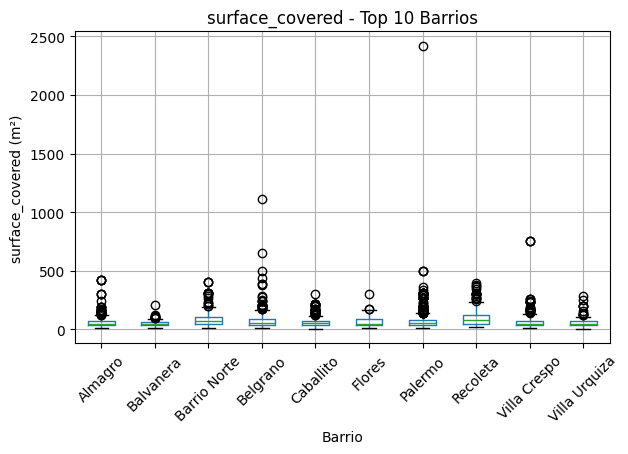

In [ ]:
column_to_study = "surface_covered"


top_l3_ap = df_ap["l3"].value_counts().head(10).index
df_top_l3_ap = df_ap[df_ap["l3"].isin(top_l3)]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_top_l3_ap.boxplot(column=column_to_study, by="l3", rot=45)
plt.title(f"{column_to_study} - Top 10 Barrios")
plt.suptitle("")
plt.xlabel("Barrio")
plt.ylabel(f"{column_to_study} (m²)")
plt.tight_layout()
plt.show()


In [ ]:
df_top_l3_ap[column_to_study].describe()

,surface_covered
count,4943.000000
mean,67.024884
std,63.576031
min,1.000000
25%,37.000000
50%,51.000000
75%,76.000000
max,2422.000000


In [ ]:
# Step 1: Calculate IQR per barrio (l3)
Q1 = df_top_l3_ap.groupby("l3")["surface_total"].quantile(0.25)
Q3 = df_top_l3_ap.groupby("l3")["surface_total"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Step 2: Merge back the bounds with the original DataFrame
iqr_df = pd.concat([Q1, Q3, IQR, upper_bound], axis=1)
iqr_df.columns = ["Q1", "Q3", "IQR", "upper_bound"]

# Step 3: Merge bounds into df_top_l3
df_top_l3_ap = df_top_l3_ap.merge(iqr_df[["upper_bound"]], left_on="l3", right_index=True)

# Step 4: Filter outliers
outliers = df_top_l3_ap[df_top_l3_ap["surface_total"] > df_top_l3_ap["upper_bound"]]

# Step 5: Display outliers
print(f"🔎 Outliers detected: {len(outliers)} registros\n")
display(outliers.sort_values("surface_total", ascending=False).head(10))  # or .to_csv() to export

🔎 Outliers detected: 297 registros



,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price,upper_bound
id,,,,,,,,,,,,,,,,,,,,,
63615,Propiedad,2020-05-06,2020-09-23,2020-05-06,-58.462330,-34.570702,Argentina,Capital Federal,Belgrano,NaN,...,1515.0,1115.0,USD,NaN,P Conde 1700 - - Casa en Venta,Increíble residencia en la mejor zona del barr...,Casa,Venta,NaN,205.00
133612,Propiedad,2020-06-29,2020-07-14,2020-06-29,-58.439628,-34.596876,Argentina,Capital Federal,Villa Crespo,NaN,...,1112.0,750.0,USD,NaN,Casa de 7 ambientes en Venta en Villa crespo,Edificio de estilo desarrollado entre medianer...,Casa,Venta,NaN,145.25
255774,Propiedad,2020-06-14,2020-06-16,2020-06-14,-58.439628,-34.596876,Argentina,Capital Federal,Villa Crespo,NaN,...,1112.0,750.0,USD,NaN,Casa de 7 ambientes en Venta en Villa crespo,Edificio de estilo desarrollado entre medianer...,Casa,Venta,NaN,145.25
959906,Propiedad,2020-05-30,2020-06-01,2020-05-30,-58.439628,-34.596876,Argentina,Capital Federal,Villa Crespo,NaN,...,1112.0,750.0,USD,NaN,Casa de 7 ambientes en Venta en Villa crespo,Edificio de estilo desarrollado entre medianer...,Casa,Venta,NaN,145.25
310846,Propiedad,2020-07-16,9999-12-31,2020-07-16,-58.444981,-34.554916,Argentina,Capital Federal,Belgrano,NaN,...,969.0,500.0,USD,NaN,Consultar dirección - - Casa en Venta,450m2 Cubiertos sobre Terreno de 1020m2 (Lote ...,Casa,Venta,NaN,205.00
189588,Propiedad,2020-05-26,2020-06-01,2020-05-26,-58.426294,-34.596815,Argentina,Capital Federal,Palermo,NaN,...,847.0,500.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,VENTA CON RENTA - ACTUAL GERIATRICO - 13 HAB ...,Casa,Venta,NaN,152.50
381963,Propiedad,2020-05-11,2020-05-20,2020-05-11,-58.426294,-34.596815,Argentina,Capital Federal,Palermo,NaN,...,847.0,500.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,VENTA CON RENTA - ACTUAL GERIATRICO - 13 HAB ...,Casa,Venta,NaN,152.50
294302,Propiedad,2020-07-25,2020-07-29,2020-07-25,-58.426294,-34.596815,Argentina,Capital Federal,Palermo,NaN,...,847.0,500.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,VENTA CON RENTA - ACTUAL GERIATRICO - 13 HAB ...,Casa,Venta,NaN,152.50
181779,Propiedad,2020-07-08,2020-07-14,2020-07-08,-58.470333,-34.574306,Argentina,Capital Federal,Belgrano,NaN,...,800.0,650.0,USD,NaN,CASA + PILETA + 4 COCHERAS + BELGRANO +VENTA,Corredor Responsable: Luis Varela - CSI 5527 /...,Casa,Venta,NaN,205.00


### 1.2. Entrenamiento

start_date         49266
end_date           49266
created_on         49266
lat                46276
lon                46276
l1                 49266
l2                 49266
l3                 49266
l4                  3738
rooms              47857
bedrooms           33732
bathrooms          48219
surface_total      49266
surface_covered    49266
currency           49266
price_period       22802
title              49262
description        49266
property_type      49266
operation_type     49266
price              49266
dtype: int64


<Figure size 1200x600 with 0 Axes>

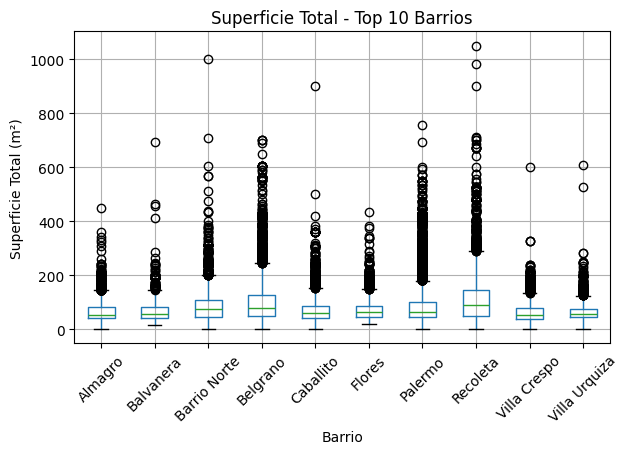

In [ ]:
# MOVER A AID
# outliers

top_l3 = df_ent["l3"].value_counts().head(10).index
df_top_l3 = df_ent[df_ent["l3"].isin(top_l3)]
df_top_l3 = df_top_l3[df_top_l3["surface_total"] < 1515] # Considerar porque los m2 del a predecir no son tantos

print(df_top_l3.count())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_top_l3.boxplot(column="surface_total", by="l3", rot=45)
plt.title("Superficie Total - Top 10 Barrios")
plt.suptitle("")
plt.xlabel("Barrio")
plt.ylabel("Superficie Total (m²)")
plt.tight_layout()
plt.show()


In [ ]:
# Mover a AID

# Step 1: Calculate IQR per barrio (l3)
Q1 = df_top_l3.groupby("l3")["surface_total"].quantile(0.25)
Q3 = df_top_l3.groupby("l3")["surface_total"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Step 2: Merge back the bounds with the original DataFrame
iqr_df = pd.concat([Q1, Q3, IQR, upper_bound], axis=1)
iqr_df.columns = ["Q1", "Q3", "IQR", "upper_bound"]

# Step 3: Merge bounds into df_top_l3
df_top_l3 = df_top_l3.merge(iqr_df[["upper_bound"]], left_on="l3", right_index=True)

# Step 4: Filter outliers
outliers = df_top_l3[df_top_l3["surface_total"] > df_top_l3["upper_bound"]]

# Step 5: Display outliers
print(f"🔎 Outliers detected: {len(outliers)} registros\n")
display(outliers.sort_values("surface_total", ascending=False).head(10))  # or .to_csv() to export


🔎 Outliers detected: 3184 registros



,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,...,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price,upper_bound
id,,,,,,,,,,,,,,,,,,,,,
677119,2019-12-20,9999-12-31,2019-12-20,-58.400423,-34.587271,Argentina,Capital Federal,Recoleta,NaN,NaN,...,1050.0,1050.0,USD,Mensual,venta propiedad en block recoleta,"Venta de Edificio en Recoleta, Capital Federal...",Departamento,Venta,2100000.0,290.5
412574,2019-09-24,2020-05-05,2019-09-24,-58.411178,-34.591575,Argentina,Capital Federal,Barrio Norte,NaN,3.0,...,1000.0,94.0,USD,Mensual,"Semi piso con dependencia, de época.","Excelente oportunidad en Barrio Norte, semipis...",Departamento,Venta,240000.0,200.0
39139,2019-12-21,2019-12-23,2019-12-21,-58.396506,-34.598362,Argentina,Capital Federal,Recoleta,NaN,1.0,...,980.0,891.0,USD,NaN,DEPARTAMENTO MONOAMBIENTE DE 89 M2 MAS AMPLIO...,"Ideal uso profesional, comercial y vivienda.89...",Departamento,Venta,295000.0,290.5
327753,2020-07-06,9999-12-31,2020-07-06,-58.389558,-34.586136,Argentina,Capital Federal,Recoleta,NaN,NaN,...,900.0,100.0,USD,Mensual,Schiaffino al 2100 // Recoleta - Venta,CODIGO: 449-09742 ubicado en: Schiaffino al 21...,Departamento,Venta,350000.0,290.5
661743,2020-01-24,2020-06-05,2020-01-24,-58.437052,-34.609730,Argentina,Capital Federal,Caballito,NaN,28.0,...,900.0,900.0,USD,Mensual,Oportunidad de inversión- Venta Edificio en B...,Oportunidad de inversión.<br>Edificio en bloc...,Departamento,Venta,950000.0,153.0
843529,2020-03-07,2020-03-09,2020-03-07,-58.434648,-34.566248,Argentina,Capital Federal,Palermo,NaN,4.0,...,757.0,366.0,USD,NaN,MIGUELETES 800,TORRE LA IMPRENTA Piso con increíble vista 360...,Departamento,Venta,2600000.0,180.0
350244,2019-11-26,2019-12-23,2019-11-26,-58.394693,-34.593626,Argentina,Capital Federal,Recoleta,NaN,9.0,...,710.0,420.0,USD,NaN,"Excelente categoría, francés con jardín UNICO ...","Espectacular de gran categoria, frances, dispo...",Departamento,Venta,1400000.0,290.5
646375,2020-01-10,9999-12-31,2020-01-10,-58.394869,-34.592514,Argentina,Capital Federal,Recoleta,NaN,NaN,...,707.0,70.0,USD,Mensual,RECOLETA - AYACUCHO 1400,CODIGO: 317-1457 ubicado en: AYACUCHO 1400 - ...,Departamento,Venta,210000.0,290.5
591142,2020-03-10,2020-09-14,2020-03-10,-58.398325,-34.594201,Argentina,Capital Federal,Barrio Norte,NaN,NaN,...,706.0,305.0,USD,Mensual,Uriburu y Arenales - Depto venta 700m2 Totales...,CODIGO: 877-acb328 ubicado en: Uriburu 1200 - ...,Departamento,Venta,1200000.0,200.0


In [ ]:
df_ent["price"].describe()

,price
count,9.407990e+05
mean,2.888822e+05
std,5.581522e+06
min,0.000000e+00
25%,3.900000e+04
50%,9.725400e+04
75%,2.100000e+05
max,3.100000e+09


In [ ]:
(df_ent["price"] == 0).sum()

np.int64(2981)

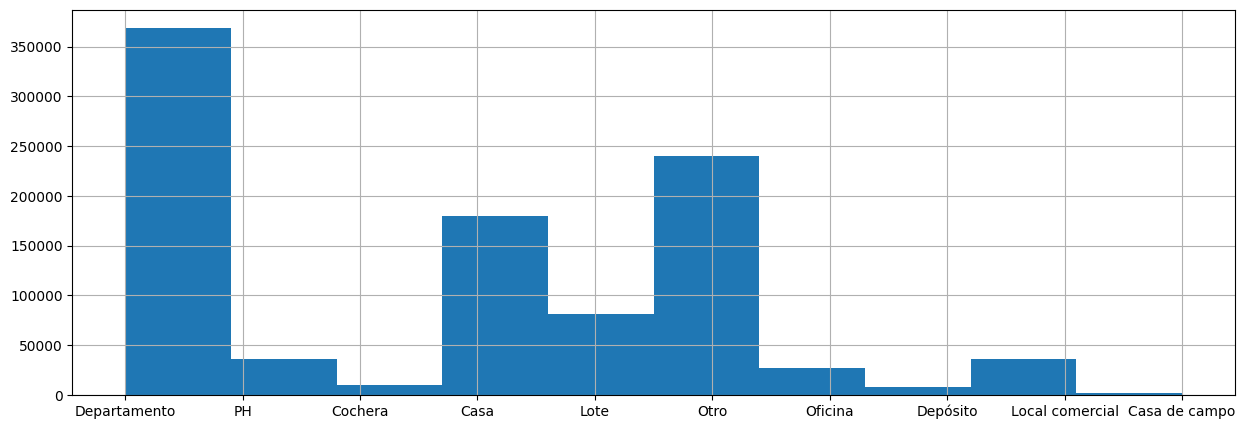

In [ ]:
df_ent["property_type"].hist(figsize=(15,5));

In [ ]:
df_ent["ad_type"].value_counts()

,count
ad_type,
Propiedad,93641


In [ ]:
df_ent["price_period"].value_counts()

,count
price_period,
Mensual,369836
Semanal,87
Diario,16


## 2. Limpiar y transformar los datos (MD)

### 2.1. Filtrado

In [81]:
# Dataset filtrado:
# Venta de departamentos en USD en Capital Federal, Argentina

valid_l3_list = [
    "Palermo", "Almagro", "Villa Crespo", "Belgrano", "Caballito", "Recoleta",
    "Villa Urquiza", "Colegiales", "Barrio Norte", "Nuñez", "Parque Centenario",
    "Balvanera", "Pompeya", "Saavedra", "Villa Devoto", "Villa del Parque",
    "San Telmo", "Flores", "Puerto Madero", "Chacarita", "Las Cañitas", "Retiro",
    "Coghlan", "Abasto", "Villa Pueyrredón", "Barracas", "Once", "San Cristobal",
    "Monserrat", "San Nicolás", "Liniers", "Boedo", "Paternal", "Villa Ortuzar",
    "Monte Castro", "Congreso", "Floresta", "Parque Chacabuco", "Villa Santa Rita",
    "Centro / Microcentro", "Villa Luro", "Villa General Mitre", "Villa Lugano",
    "Agronomía", "Mataderos", "Parque Chas", "Tribunales", "Parque Avellaneda",
    "Constitución", "Versalles", "Villa Real", "Parque Patricios", "Boca",
    "Velez Sarsfield"
]
df_ent = df_ent[df_ent["l3"].isin(valid_l3_list)]

df_ent = df_ent.loc[
    (df_ent["l1"] == "Argentina") &
    (df_ent["l2"] == "Capital Federal") &
    (df_ent["l3"].isin(valid_l3_list)) &
    (df_ent["property_type"] == "Departamento") &  # Agregar casas y cocheras
    (df_ent["operation_type"] == "Venta") &
    (df_ent["currency"] == "USD")
]
df_ent.shape

(88829, 24)

### 2.2. Imputación de valores perdidos

In [82]:
# Dropeo de columnas vacias
df_ent.drop(columns=["l5", "l6", "ad_type"], inplace=True)
#TODO: Revisar si mantener o no l4 (segun yo, nop)

In [83]:
# surface_total vs surface_covered

# Estado inicial
initial_missing_total = df_ent["surface_total"].isna().sum()
initial_missing_covered = df_ent["surface_covered"].isna().sum()

print(f"Initial missing surface_total: {initial_missing_total}")
print(f"Initial missing surface_covered: {initial_missing_covered}")

# 1. Completar surface_total con surface_covered y viceversa
filled_total = df_ent["surface_total"].isna() & df_ent["surface_covered"].notna()
filled_covered = df_ent["surface_covered"].isna() & df_ent["surface_total"].notna()

df_ent["surface_total"] = df_ent["surface_total"].fillna(df_ent["surface_covered"])
df_ent["surface_covered"] = df_ent["surface_covered"].fillna(df_ent["surface_total"])

print(f"→ Filled surface_total from covered: {filled_total.sum()} registros")
print(f"→ Filled surface_covered from total: {filled_covered.sum()} registros")

# 2. Agregando mediana por barrio a los registros faltantes
cols_to_fill = ["surface_total", "surface_covered"] # , "rooms", "bathrooms" #TODO: Mantener si el modelo empeora

for col in cols_to_fill:
    df_ent[col] = df_ent.groupby("l3")[col].transform(lambda x: x.fillna(x.median()))

# 3. Si surface_covered > surface_total, invertir los valores
mask = df_ent["surface_total"] < df_ent["surface_covered"]
mask &= df_ent["surface_total"].notna() & df_ent["surface_covered"].notna()

print(f"→ Swapped surface_total < surface_covered: {mask.sum()} registros")

df_ent.loc[mask, ["surface_total", "surface_covered"]] = df_ent.loc[mask, ["surface_covered", "surface_total"]].values

# No deberíamos tener NAs pendientes
missing_total = df_ent["surface_total"].isna().sum()
missing_covered = df_ent["surface_covered"].isna().sum()

print(f"Remaining missing surface_total: {missing_total}")
print(f"Remaining missing surface_covered: {missing_covered}")

# Removiendo outliers
df_ent = df_ent[df_ent["surface_total"] <= 1515] # Basado en max de df_ap
df_ent = df_ent[df_ent["surface_covered"] <= 2522] # Basado en max de df_ap

print(f"Remaining registries: {df_ent.shape}")

Initial missing surface_total: 19214
Initial missing surface_covered: 18239
→ Filled surface_total from covered: 2721 registros
→ Filled surface_covered from total: 1746 registros
→ Swapped surface_total < surface_covered: 552 registros
Remaining missing surface_total: 0
Remaining missing surface_covered: 0
Remaining registries: (88705, 21)


In [84]:
df_ent["price"].describe()
# df_ent[df_ent["surface_total"] == max(df_ent["surface_total"])]

,price
count,8.870500e+04
mean,2.442326e+05
std,3.532904e+05
min,5.000000e+03
25%,1.090000e+05
50%,1.575000e+05
75%,2.500000e+05
max,3.243423e+07


In [85]:
# price
df_ent = df_ent[
    (df_ent["price"].notna())
    & (df_ent["price"] >= 0)
    & (df_ent["price"] <= 1000000)
]


In [86]:
# Latitud y longitud

# Cambiando posición de latitud y longitud (estaban invertidas)
df_ent[["lat", "lon"]] = df_ent[["lon", "lat"]]

# Agregando columna para verificar si entran en el rango de CABA
df_ent["is_valid_geo"] = (
    (df_ent["lat"] >= -34.70) & (df_ent["lat"] <= -34.50) &
    (df_ent["lon"] >= -58.53) & (df_ent["lon"] <= -58.35)
).astype(int)

print(f"Lat y lon validas: {df_ent['is_valid_geo'].value_counts()}")

# Nos quedamos solamente con las que son válidas
df_ent = df_ent[df_ent["is_valid_geo"] == 1]

Lat y lon validas: is_valid_geo
1    82070
0     4371
Name: count, dtype: int64


In [87]:
df_ent.shape

(82070, 22)

## 3. Entrenamiento del modelos (AA)

In [88]:
# La creación de modelos requiere que todo el dataframe sea numérico
# Me quedo con las columnas numéricas solamente

# Categorias de caracteres a codificadas en numeros
df_ent["l3"] = df_ent["l3"].fillna("missing")
df_ent["l4"] = df_ent["l4"].fillna("missing")

l3_codes = df_ent["l3"].astype("category")
l4_codes = df_ent["l4"].astype("category")

df_ent["l3"] = l3_codes.cat.codes
df_ent["l4"] = l4_codes.cat.codes

l3_mapping = dict(enumerate(l3_codes.cat.categories))
l4_mapping = dict(enumerate(l4_codes.cat.categories))

df_ent = df_ent.select_dtypes('number')

X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']



In [89]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el valor de los hiperparámetros a usar por el modelo
# TODO: hacer pruebas cambiando los valores de los hiperparámetros para mejorar el score
n_estimators = 75 #ant 50 #75
max_depth = 7 #ant 5 #7
min_samples_leaf = 1 #ant 1
max_features=None

### NO CAMBIAR RandomForestRegressor por otro modelo
### NOTA: Si en la primera entrega usan otro modelo, su nota será 0
### Pueden cambiar los hiperparámetros que afectan al árbol: n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease
reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_features=max_features, n_jobs=-1, random_state=42)

# Entrenamos el modelo
_ = reg.fit(X_train, y_train)

# Cálculo del error en entrenamiento (train)
y_pred = reg.predict(X_train)
score_train = sk.metrics.root_mean_squared_error(y_train, y_pred)

# Cálculo del error en prueba (test)
y_pred = reg.predict(X_test)
score_test  = sk.metrics.root_mean_squared_error(y_test,  y_pred)

print(f"{n_estimators=} -- {max_depth=} -- {min_samples_leaf=} -- {max_features=} --> {score_train=:.2f} - {score_test=:.2f}")

n_estimators=75 -- max_depth=7 -- min_samples_leaf=1 -- max_features=None --> score_train=65246.61 - score_test=64241.32


## 4. Solución para subir Kaggle

In [90]:
df_ap = pd.read_csv(f"{DIR}/a_predecir.zip", index_col="id")
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
1068,Propiedad,2020-06-21,2020-06-27,2020-06-21,NaN,NaN,Argentina,Capital Federal,Palermo,Palermo Viejo,...,1.0,286.0,160.0,USD,NaN,Casa de 4 ambientes en Venta en Palermo viejo,TRIPLEX EN MEDIO TERRENO DE 4 AMB MUY AMPLIOS...,Casa,Venta,NaN
1069,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.426576,-34.590987,Argentina,Capital Federal,Palermo,NaN,...,5.0,444.0,270.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,OPORTUNIDAD!! Edificio en Block desarrollado e...,Casa,Venta,NaN
1073,Propiedad,2020-06-21,2020-06-24,2020-06-21,-58.479808,-34.631266,Argentina,Capital Federal,Floresta,NaN,...,2.0,166.0,120.0,USD,NaN,Venta de casa en PH en Floresta,Casa con muy buena distribución y de amplios a...,Casa,Venta,NaN
1082,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.437889,-34.603291,Argentina,Capital Federal,Villa Crespo,NaN,...,3.0,352.0,185.0,USD,NaN,Casa de 5 ambientes en Venta en Villa crespo,SON 185 METROS CUBIERNTOS CON COCHERA MAS PATI...,Casa,Venta,NaN
1091,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.476461,-34.602494,Argentina,Capital Federal,Villa del Parque,NaN,...,2.0,168.0,106.0,USD,NaN,Venta de casa de tres ambientes en Villa del P...,"Hermosa casa ubicada en zona residencial, sobr...",Casa,Venta,NaN


In [ ]:
df_ap.shape

(7012, 24)

In [91]:
X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']

# Entrenamos el modelo con todos los datos de entrenamiento.csv
reg.fit(X, y)

RandomForestRegressor(max_depth=7, max_features=None, n_estimators=75,
                      n_jobs=-1, random_state=42)

### Limpieza set a predecir

In [92]:
# surface_total vs surface_covered

# Estado inicial
initial_missing_total = df_ap["surface_total"].isna().sum()
initial_missing_covered = df_ap["surface_covered"].isna().sum()

print(f"Initial missing surface_total: {initial_missing_total}")
print(f"Initial missing surface_covered: {initial_missing_covered}")

# 1. Completar surface_total con surface_covered y viceversa
filled_total = df_ap["surface_total"].isna() & df_ap["surface_covered"].notna()
filled_covered = df_ap["surface_covered"].isna() & df_ap["surface_total"].notna()

df_ap["surface_total"] = df_ap["surface_total"].fillna(df_ap["surface_covered"])
df_ap["surface_covered"] = df_ap["surface_covered"].fillna(df_ap["surface_total"])

print(f"→ Filled surface_total from covered: {filled_total.sum()} registros")
print(f"→ Filled surface_covered from total: {filled_covered.sum()} registros")

# 2. Agregando mediana por barrio a los registros faltantes
cols_to_fill = ["surface_total", "surface_covered"] # , "rooms", "bathrooms" #TODO: Mantener si el modelo empeora

for col in cols_to_fill:
    df_ap[col] = df_ap.groupby("l3")[col].transform(lambda x: x.fillna(x.median()))

# 3. Si surface_covered > surface_total, invertir los valores
mask = df_ap["surface_total"] < df_ap["surface_covered"]
mask &= df_ap["surface_total"].notna() & df_ap["surface_covered"].notna()

print(f"→ Swapped surface_total < surface_covered: {mask.sum()} registros")

df_ap.loc[mask, ["surface_total", "surface_covered"]] = df_ap.loc[mask, ["surface_covered", "surface_total"]].values

# No deberíamos tener NAs pendientes
missing_total = df_ap["surface_total"].isna().sum()
missing_covered = df_ap["surface_covered"].isna().sum()

print(f"Remaining missing surface_total: {missing_total}")
print(f"Remaining missing surface_covered: {missing_covered}")

# # Removiendo outliers
# df_ent = df_ent[df_ent["surface_total"] <= 1515] # Basado en max de df_ap
# df_ent = df_ent[df_ent["surface_covered"] <= 2522] # Basado en max de df_ap

# print(f"Remaining registries: {df_ent.shape}")

Initial missing surface_total: 32
Initial missing surface_covered: 74
→ Filled surface_total from covered: 32 registros
→ Filled surface_covered from total: 74 registros
→ Swapped surface_total < surface_covered: 26 registros
Remaining missing surface_total: 8
Remaining missing surface_covered: 8


In [93]:
# Latitud y longitud

# Cambiando posición de latitud y longitud (estaban invertidas)
df_ap[["lat", "lon"]] = df_ap[["lon", "lat"]]

# Agregando columna para verificar si entran en el rango de CABA
df_ap["is_valid_geo"] = (
    (df_ap["lat"] >= -34.70) & (df_ap["lat"] <= -34.50) &
    (df_ap["lon"] >= -58.53) & (df_ap["lon"] <= -58.35)
).astype(int)

print(f"Lat y lon validas: {df_ap['is_valid_geo'].value_counts()}")

# # Nos quedamos solamente con las que son válidas
# df_ent = df_ent[df_ent["is_valid_geo"] == 1]

Lat y lon validas: is_valid_geo
1    6538
0     474
Name: count, dtype: int64


In [94]:
# Preparando modelo
l3_inverse_map = {v: k for k, v in l3_mapping.items()}
l4_inverse_map = {v: k for k, v in l4_mapping.items()}

# Fill missing values consistently
df_ap["l3"] = df_ap["l3"].fillna("missing")
df_ap["l4"] = df_ap["l4"].fillna("missing")

# Encode using existing mapping (unseen labels will get -1)
df_ap["l3"] = df_ap["l3"].map(l3_inverse_map).fillna(-1).astype(int)
df_ap["l4"] = df_ap["l4"].map(l4_inverse_map).fillna(-1).astype(int)

df_ap = df_ap.select_dtypes('number')

X_ap = df_ap[X.columns]
# y_ap = df_ap['price'] # no es necesario!

# Predecimos los precios del dataset a predecir
y_pred_ap = reg.predict(X_ap)
y_pred_ap

array([699103.72184261, 816444.31099031, 341340.30073257, ...,
       771125.71018096, 245437.39964382, 231579.00011714])

In [95]:
# Lleno el precio de df_ap con las predicciones
df_ap["price"] = y_pred_ap

# Grabo el df_ap en un archivo csv para subir a Kaggle
df_ap["price"].to_csv("solucion.csv")